In [1]:
import numpy as np
import synd.core
import deeptime.markov.msm as dm
from mr_toolkit.reweighting import analysis as rwa
from matplotlib import pyplot as plt
from scipy.stats import entropy

/home/jd/anaconda3/envs/mr_toolkit/lib/python3.11/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[11:46:35] WARNING  msm_we not found, fpt_distribution calculations will be unavailable              ]8;id=174370;file:///home/jd/research/reweighting/mr_toolkit/mr_toolkit/mr_toolkit/reweighting/analysis.py\analysis.py]8;;\:]8;id=720431;file:///home/jd/research/reweighting/mr_toolkit/mr_toolkit/mr_toolkit/reweighting/analysis.py#16\16]8;;\

# Reweighted MSM Estimation

First, we load a set of pre-discretized sample trajectories to analyze.

In [2]:
trajectories = np.load('sample_data/coarser-sample_trajectories.npy')

Define a set of source and target states

In [3]:
state_definitions = np.load('sample_data/coarser-state_definitions.npz')

source_states = state_definitions['source']
target_states = state_definitions['target']
# target_states = np.array([400,401,402])

In [4]:
ref_equil = np.load('sample_data/coarser-reference_distributions.npz')['equil']

In [5]:
lagtime = 10

# Standard MSM

Now, we build a standard MSM.

In [6]:
msm = dm.MaximumLikelihoodMSM().fit_from_discrete_timeseries(trajectories, lagtime)

What is the MSM estimate of equilibrium like?

In [7]:
msm_equil = msm.fetch_model().stationary_distribution

# Reweighted MSM

Now, let's build a reweighted MSM.

In [8]:
(states, stationaries, last_iter, reweighted_matrices,) = rwa.compute_reweighted_stationary(
    trajectories, 
    N=750, 
    lag=1, 
    n_clusters=len(msm_equil),
    n_reweighting_iters=10,
    min_weight=1e-12,
    last_frac=0.5
)

Building count matrices: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 99990/99990 [00:01<00:00, 61021.41it/s]
Reweighting convergence:  80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                           | 8/10.0 [00:00<00:00, 114.48it/s]

reweighted iteration is converged at iter 9


What is the reweighted estimate of equilibrium like?

In [9]:
reweighted_equil = stationaries[-1]

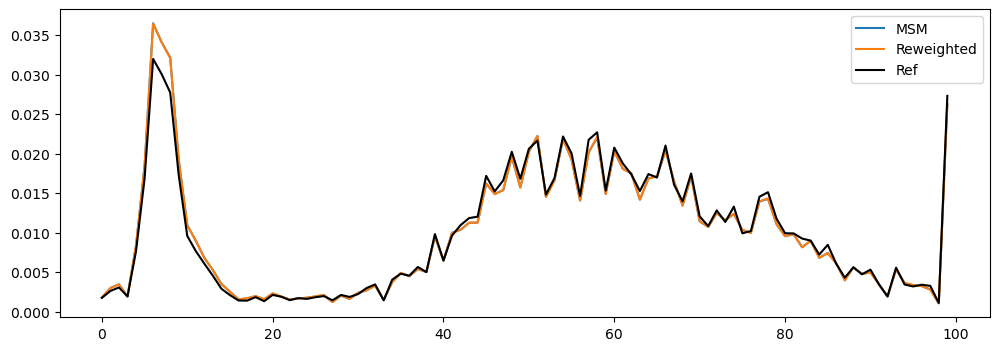

In [10]:
plt.plot(msm_equil, label='MSM')
plt.plot(reweighted_equil, label='Reweighted')
plt.plot(ref_equil, color='k', label='Ref')

plt.gcf().set_size_inches(12,4)
plt.legend()

In [11]:
msm_entropy = entropy(msm_equil, ref_equil)
reweighted_entropy = entropy(reweighted_equil, ref_equil)

In [12]:
print("Relative entropies to reference (lower is better)")
print(f"MSM estimate: \t{msm_entropy:.2e}")
print(f"Reweighted estimate: \t{reweighted_entropy:.2e}")

Relative entropies to reference (lower is better)
MSM estimate: 	2.51e-03
Reweighted estimate: 	2.46e-03
